# Problem Statement: Abalone Age Prediction <br>
**Description**:- <br> &emsp;&emsp;&emsp; Predicting the age of abalone from physical measurements. The age of abalone is
determined by cutting the shell through the cone, staining it, and counting the number of rings through
a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain,
are used to predict age. Further information, such as weather patterns and location (hence food
availability) may be required to solve the problem.

#### Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### 2. Load the dataset into the tool.

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 3. Perform Below Visualizations.
* Univariate Analysis
* Bi-Variate Analysis
* Multi-Variate Analysis

In [3]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
df['age'] = df['Rings']+1.5 
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


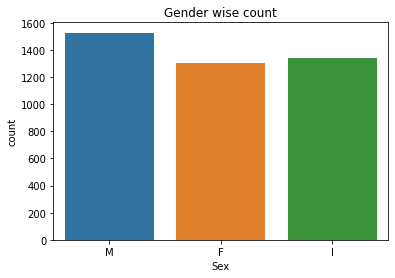

In [5]:
sns.countplot(x = df['Sex'])
plt.title('Gender wise count')
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

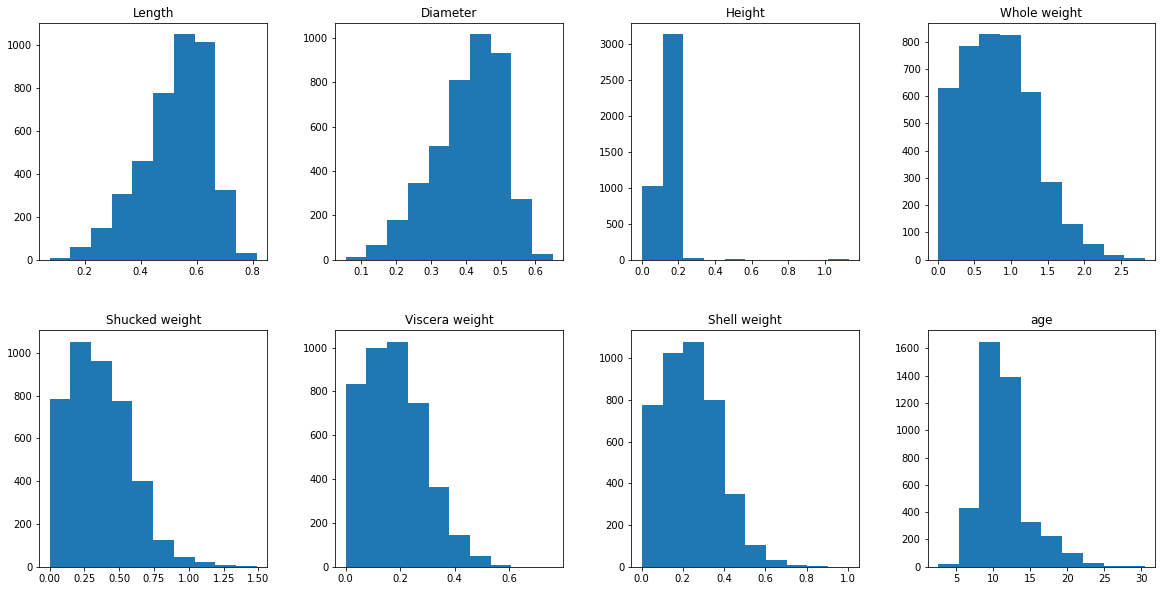

In [6]:
df.hist(figsize = (20, 10) , layout= (2,4),grid=False)

<AxesSubplot:>

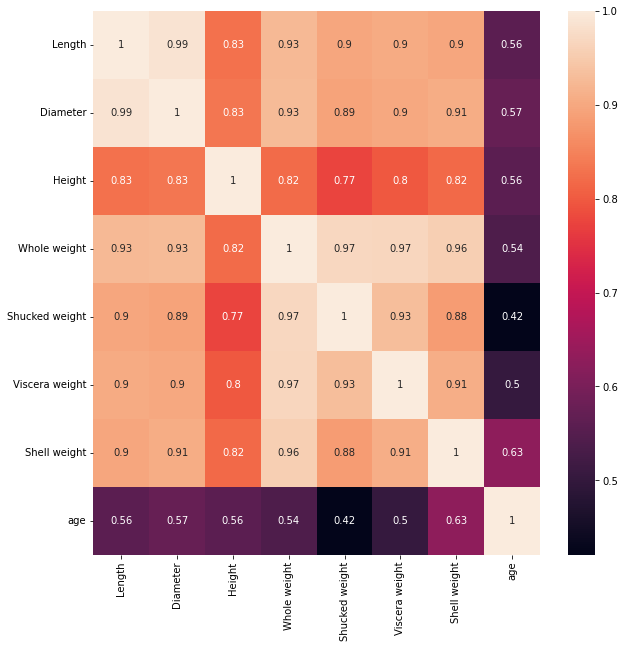

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

#### 5. Check for Missing values and deal with them.

In [8]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [9]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age


#### 6. Find the outliers and replace them outliers

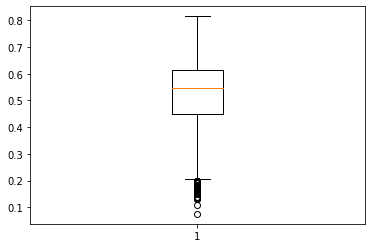

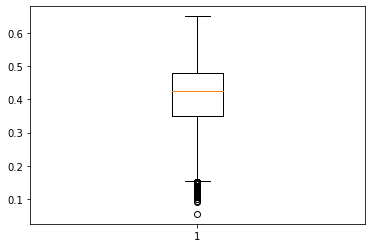

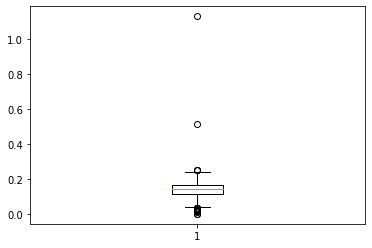

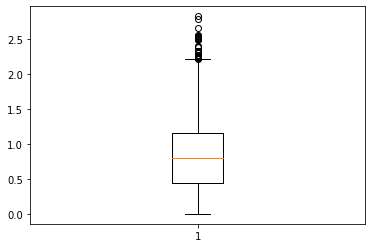

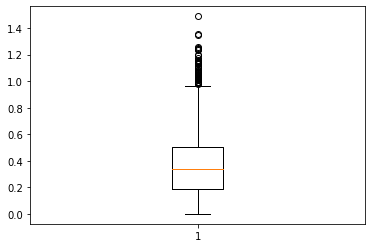

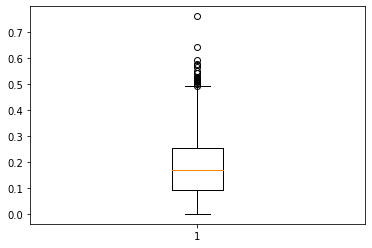

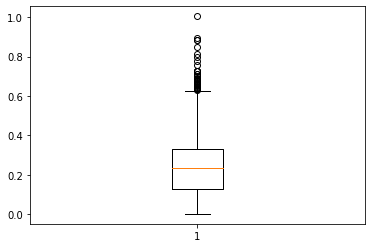

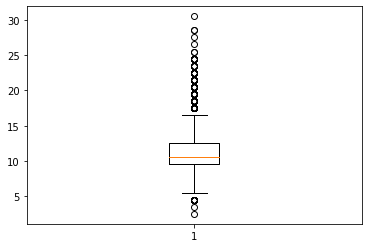

In [10]:
for i in df:
    if df[i].dtype != object:
        plt.boxplot(df[i])
        plt.show()

In [11]:
for i in df:
    if df[i].dtype != 'object':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

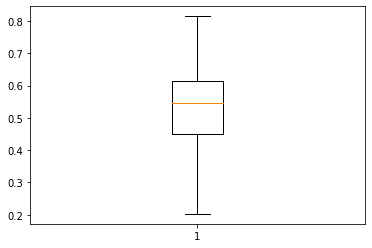

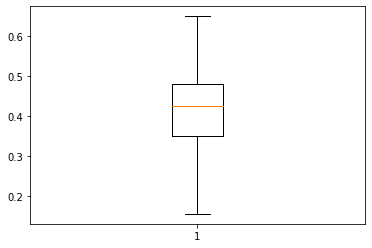

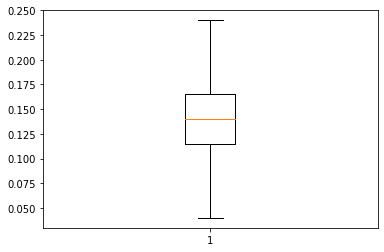

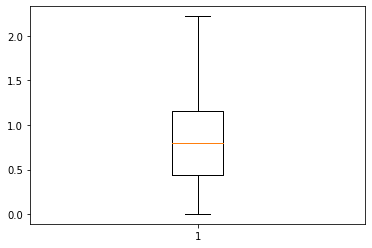

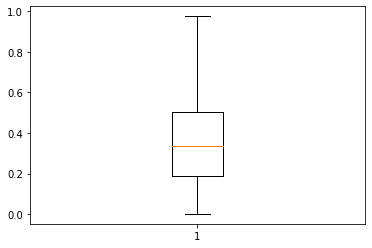

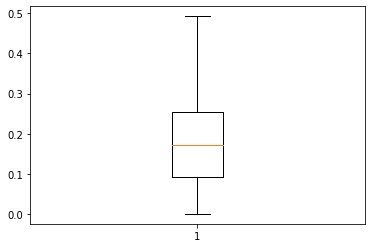

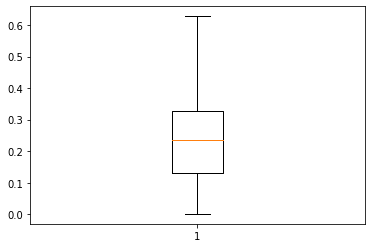

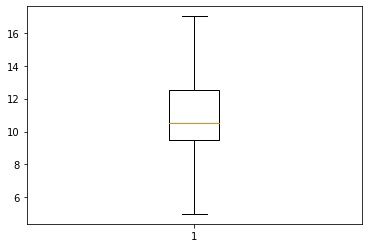

In [12]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        plt.boxplot(df[i])
        plt.show()

In [13]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


##### 7. Check for Categorical columns and perform encoding.

In [14]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#### 8. Split the data into dependent and independent variables.

In [15]:
X=df.iloc[:,:-1]
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [16]:
Y=df.iloc[:,-1]
Y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

#### 9. Scale the independent variables

In [17]:
scaler=StandardScaler()
x=scaler.fit_transform(X)

#### 10. Split the data into training and testing

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y,random_state=2)

In [19]:
print("X_train shape : ", X_train.shape)
print("Y_train shape : ", Y_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape :  (3341, 8)
Y_train shape :  (3341,)
X_test shape :  (836, 8)
Y_test shape :  (836,)


#### 11. Build the Model 
#### 12. Train the Model
#### 13. Test the Model

In [20]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [21]:
print("Precision Metrics for Linear Regression")
print("mean_squared_error = ", mean_squared_error(Y_test,Y_pred)**0.5)
print("mean_absolute_error = ", mean_absolute_error(Y_test,Y_pred))


Precision Metrics for Linear Regression
mean_squared_error =  1.7977476964944077
mean_absolute_error =  1.3889436441310137


In [22]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

14. Measure the performance using Metrics.

In [23]:
print("Precision Metrics for Random Forest Regressor")
print("mean_squared_error = ", mean_squared_error(Y_test,Y_pred)**0.5)
print("mean_absolute_error = ", mean_absolute_error(Y_test,Y_pred))

Precision Metrics for Random Forest Regressor
mean_squared_error =  1.740982654728928
mean_absolute_error =  1.3264055023923444
